# **42-SOT For vs Against**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from highlight_text import ax_text, fig_text


from PIL import Image
import urllib
import json
import os
import math

#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime

In [29]:
df = pd.read_html('https://fbref.com/en/comps/9/shooting/Premier-League-Stats#stats_shooting')
df1 = pd.DataFrame(df[0])
df1.columns = ["Squad","Pl","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh",",G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]

In [30]:
la= pd.read_html('https://fbref.com/en/comps/9/shooting/Premier-League-Stats#stats_squads_shooting_against')
df2 = pd.DataFrame(la[1])
df2.columns = ["Squad","Pl","90s","Gls","Sh","SoT","SoT%","Sh/90","SoT/90","G/Sh",",G/SoT","Dist","FK","PK","PKatt","xG","npxG","npxG/Sh","G-xG","np:G-xG"]

In [31]:
df1.head()

,Squad,Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,",G/SoT",Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,23,14.0,32,221,77,34.8,15.79,5.50,0.14,0.40,15.9,7,1,1,26.2,25.7,0.12,5.8,5.3
1,Aston Villa,23,15.0,16,162,56,34.6,10.80,3.73,0.09,0.25,18.7,6,2,2,17.1,15.7,0.10,-1.1,-1.7
2,Bournemouth,25,15.0,18,122,48,39.3,8.13,3.20,0.15,0.38,15.7,4,0,0,11.6,11.6,0.10,6.4,6.4
3,Brentford,24,15.0,23,152,58,38.2,10.13,3.87,0.13,0.33,15.8,5,4,4,20.3,17.2,0.12,2.7,1.8
4,Brighton,21,14.0,20,192,69,35.9,13.71,4.93,0.09,0.25,17.0,5,3,3,21.5,19.3,0.10,-1.5,-2.3


In [32]:
df2.head()

,Squad,Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,",G/SoT",Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,vs Arsenal,23,14.0,10,112,36,32.1,8.00,2.57,0.08,0.25,17.2,3,1,2,11.8,10.3,0.09,-1.8,-1.3
1,vs Aston Villa,23,15.0,19,170,58,34.1,11.33,3.87,0.10,0.29,17.1,7,2,3,19.3,16.9,0.10,-0.3,0.1
2,vs Bournemouth,25,15.0,30,236,69,29.2,15.73,4.60,0.11,0.36,17.2,6,5,5,24.2,20.3,0.09,5.8,4.7
3,vs Brentford,24,15.0,23,237,86,36.3,15.80,5.73,0.09,0.26,19.1,3,1,1,20.3,19.6,0.09,2.7,2.4
4,vs Brighton,21,14.0,16,130,44,33.8,9.29,3.14,0.09,0.27,17.1,4,4,4,15.9,12.7,0.10,0.1,-0.7


In [37]:
df2["Squad"] = df2["Squad"].apply(lambda x : x[1:])

In [38]:
df2.iloc[0,0]

'Arsenal'

In [42]:
df2.rename(columns = {'SoT':'SoTa'}, inplace = True)

In [43]:
df2

,Squad,Pl,90s,Gls,Sh,SoTa,SoT%,Sh/90,SoT/90,G/Sh,",G/SoT",Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,23,14.0,10,112,36,32.1,8.00,2.57,0.08,0.25,17.2,3,1,2,11.8,10.3,0.09,-1.8,-1.3
1,Aston Villa,23,15.0,19,170,58,34.1,11.33,3.87,0.10,0.29,17.1,7,2,3,19.3,16.9,0.10,-0.3,0.1
2,Bournemouth,25,15.0,30,236,69,29.2,15.73,4.60,0.11,0.36,17.2,6,5,5,24.2,20.3,0.09,5.8,4.7
3,Brentford,24,15.0,23,237,86,36.3,15.80,5.73,0.09,0.26,19.1,3,1,1,20.3,19.6,0.09,2.7,2.4
4,Brighton,21,14.0,16,130,44,33.8,9.29,3.14,0.09,0.27,17.1,4,4,4,15.9,12.7,0.10,0.1,-0.7
5,Chelsea,24,14.0,15,159,62,39.0,11.36,4.43,0.09,0.24,16.3,3,0,0,19.3,19.3,0.13,-4.3,-4.3
6,Crystal Palace,20,14.0,17,181,54,29.8,12.93,3.86,0.09,0.31,15.9,5,0,0,18.3,18.3,0.11,-1.3,-1.3
7,Everton,26,15.0,17,252,79,31.3,16.80,5.27,0.06,0.19,15.9,6,2,2,25.4,23.9,0.10,-8.4,-8.9
8,Fulham,27,15.0,26,202,83,41.1,13.47,5.53,0.11,0.28,15.3,5,3,3,27.3,25.5,0.13,-1.3,-2.5
9,Leeds United,24,14.0,25,178,68,38.2,12.71,4.86,0.13,0.35,16.7,7,1,1,20.2,19.5,0.11,4.8,4.5


In [39]:
df3 = df1[["Squad","SoT"]]

In [41]:
df3.head()

,Squad,SoT
0,Arsenal,77
1,Aston Villa,56
2,Bournemouth,48
3,Brentford,58
4,Brighton,69


In [45]:
df2["Squad"]=df2["Squad"].astype(str)

In [47]:
df2.head()

,Squad,Pl,90s,Gls,Sh,SoTa,SoT%,Sh/90,SoT/90,G/Sh,",G/SoT",Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,23,14.0,10,112,36,32.1,8.00,2.57,0.08,0.25,17.2,3,1,2,11.8,10.3,0.09,-1.8,-1.3
1,Aston Villa,23,15.0,19,170,58,34.1,11.33,3.87,0.10,0.29,17.1,7,2,3,19.3,16.9,0.10,-0.3,0.1
2,Bournemouth,25,15.0,30,236,69,29.2,15.73,4.60,0.11,0.36,17.2,6,5,5,24.2,20.3,0.09,5.8,4.7
3,Brentford,24,15.0,23,237,86,36.3,15.80,5.73,0.09,0.26,19.1,3,1,1,20.3,19.6,0.09,2.7,2.4
4,Brighton,21,14.0,16,130,44,33.8,9.29,3.14,0.09,0.27,17.1,4,4,4,15.9,12.7,0.10,0.1,-0.7


In [48]:
# applying merge with more parameters
df3 =df3.merge(df2[['SoTa','Squad']], on = 'Squad',how = 'inner')

In [49]:
df3

,Squad,SoT,SoTa
0,Arsenal,77,36
1,Aston Villa,56,58
2,Bournemouth,48,69
3,Brentford,58,86
4,Brighton,69,44
5,Chelsea,52,62
6,Crystal Palace,52,54
7,Everton,51,79
8,Fulham,59,83
9,Leeds United,58,68


In [59]:
df3.describe()

,SoT,SoTa,code
count,20.000000,20.000000,20.000000
mean,61.850000,61.850000,9226.100000
std,13.366395,13.762172,802.310998
min,42.000000,36.000000,8197.000000
25%,52.000000,55.500000,8556.000000
50%,58.000000,61.500000,8673.000000
75%,71.000000,68.250000,10003.500000
max,87.000000,86.000000,10261.000000


In [50]:
codes = { "Liverpool" :8650,  "Manchester City" :  8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds United" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle Utd" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester Utd" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nott'ham Forest":10203,
   "Wolves":8602,
                    "West Ham" :8654,
                   "Leicester City" : 8197,
               "Bournemouth" :8678}

df3["SoT"] =df3["SoT"].astype(float)
df3["SoTa"] =df3["SoTa"].astype(float)

clubs = []
for x in (df3["Squad"]):
    if x in codes:
        clubs.append(codes[x])
df3["code"] = clubs


In [52]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [68]:
X =df3["SoT"].mean()
Y =df3["SoTa"].mean()

# PLOT

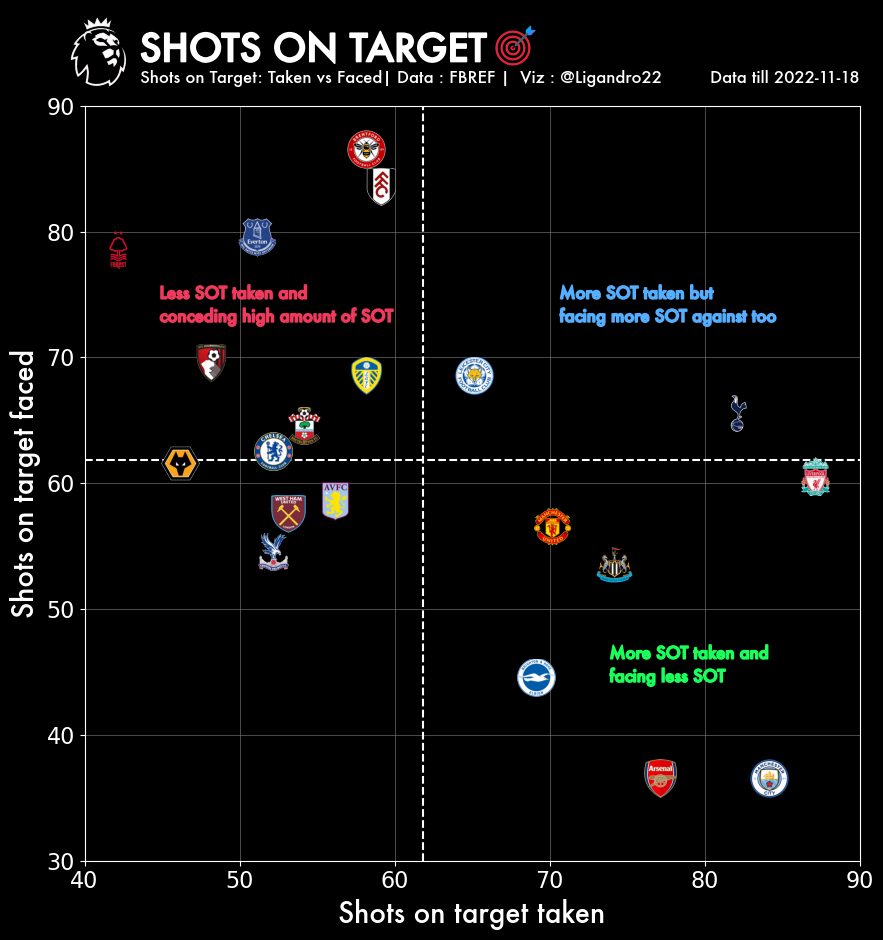

In [100]:
fig = plt.figure(figsize=(10,10), dpi=100)
ax = plt.subplot()

ax.set_ylim(30,90)
ax.set_xlim(40,90)


x = datetime.datetime.now()
x = str(x)
date = x[:10]

fig.set_facecolor('black')
ax.patch.set_facecolor('black')
    



#changing colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


# Add spines
ax.spines["top"].set_color('white')   
ax.spines["right"].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')


ax_size = 0.05
# Draw grid lines with red color and dashed style
plt.grid(color='grey', linestyle='-', linewidth=0.7,alpha=0.6)

plt.xlabel("Shots on target taken",font ="Futura",fontsize = 20,color="white")
plt.ylabel("Shots on target faced",font ="Futura",fontsize = 20,color= "white")
ax.tick_params(labelsize=16)


# avg lines
#percentile line
xpoints = [40,90]
ypoints = [Y, Y]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


xpoints = [X,  X]
ypoints = [30,90]

plt.plot(xpoints, ypoints, color = 'white',linestyle = '--')


# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

#add logos
counter = 0
for x,y in zip(df3["SoT"],df3["SoTa"]):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/3, ax_coords[1] - ax_size/4, ax_size/1.3, ax_size/1.3],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1
    
#Change font of tick labels
plt.yticks(fontname = "Futura")
plt.xticks(fontname = "Futura")
fig.text(
    x = 0.18, y = .9142, 
    s = 'SHOTS ON TARGET',
    va = 'bottom', ha = 'left',
    fontsize = 27,  fontname = "Futura", weight = 'bold',color="white",
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="white"), path_effects.Normal()]
)

fig.text(
    x = 0.18, y = 0.899, 
    s = 'Shots on Target: Taken vs Faced| Data : FBREF |  Viz : @Ligandro22',
    va = 'bottom', ha = 'left',
    fontsize = 12,  fontname = "Futura", weight = 'bold',color="white"
)

fig.text(
    x = 0.75, y = 0.899, 
    s = 'Data till ' + date,
    va = 'bottom', ha = 'left',
    fontsize = 12, fontname = "Futura",color = 'white'
)

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/PREM.png')
ax_image = add_image(
          im1, fig, left=0.09, bottom=0.882, width=0.1, height=0.1
    )   # these values might differ when you are plotting

# add image
im1 = plt.imread('/Users/ligandrosy/Downloads/sot.png')
ax_image = add_image(
          im1, fig, left=0.52, bottom=0.905, width=0.07, height=0.07
    )   # these values might differ when you are plotting

fig_text(
	x = 0.6, y = 0.7, 
    s = "More SOT taken but \nfacing more SOT against too",
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="#56AEFF"), path_effects.Normal()],
    fontsize = 12, fontname = "Futura",color = '#56AEFF'
)


fig_text(
	x = 0.65, y = 0.34, 
    s = "More SOT taken and \nfacing less SOT",
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="#19FF5B"), path_effects.Normal()],
    fontsize = 12, fontname = "Futura",color = '#19FF5B'
)
fig_text(
	x = 0.2, y = 0.7, 
    s = "Less SOT taken and \nconceding high amount of SOT",
    path_effects=[path_effects.Stroke(linewidth=1.2, foreground="#EF3A5D"), path_effects.Normal()],
    fontsize = 12, fontname = "Futura",color = '#EF3A5D'
)

plt.savefig("AFC VS ARS.jpg",dpi =500, bbox_inches='tight')